# Chi-Square Test for 2 Categorical Variables

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# Step 1: Read the Excel file using pandas
excel_file = '/content/drive/MyDrive/Colab Notebooks/QT_200res_demo.xlsx'
df = pd.read_excel(excel_file, index_col=0, sheet_name='Post_EMRD', skiprows=1)

In [ ]:
Age_mapping = {'Less than 18' : 0, '18 - 25': 1, '26 - 35': 2, '36 - 45': 3, '46 - 55' : 4, '56 - 65' : 5, 'Greater than 65' : 6}
Agree_mapping = {'Strongly disagree': 0, 'Disagree' : 1, 'Neutral' : 2, 'Agree' : 3, 'Strongly agree' : 4}
Experience_mapping = {'Less than 5 years': 0, '5-10 years' : 1, '11-20 years' : 2, 'More than 20 years' : 3}
Familiarity_mapping = {'Unfamiliar': 0, 'Less familiar' : 1, 'Familiar' : 2, 'Very familiar' : 3, 'Most familiar' : 4}
Lagging_mapping = {'Highly lagging': 0, 'Lagging' : 1, 'Moderate' : 2, 'Advanced' : 3, 'Highly advanced' : 4}
Criticality_mapping = {'Not critical': 0, 'Less critical' : 1, 'Critical' : 2, 'Very critical' : 3, 'Extremely critical' : 4}
Importance_mapping = {'Not important': 0, 'Less important' : 1, 'Important' : 2, 'Very important' : 3, 'Extremely important' : 4}
Softautomation_mapping = {'No available': 0, 'Poor' : 1, 'Moderate' : 2, 'Advanced' : 3, 'Highly Advanced' : 4}
Softtraining_mapping = {'No training available': 0, 'Poor' : 1, 'Moderate' : 2, 'Advanced' : 3, 'Highly Advanced' : 4}
IT_mapping = {'Artificial Intelligence (AI)': 0, 'Autonomous System' : 1, 'Big Data and Analytics' : 2, 'Cloud Computing' : 3, 'Cyber Security' : 4, 'Internet of Things (IoT)' : 5, 'Robotics' : 6, 'Simulation' : 7, '3D Printing' : 8}


In [ ]:
unique_count = df['Expertise'].nunique()
print(f"Column has {unique_count} unique values.")

Column has 31 unique values.


In [ ]:
unique_count = df['Discipline'].nunique()
print(f"Column has {unique_count} unique values.")

Column has 23 unique values.


In [ ]:
df['Discipline']

,Discipline
ID,
EMRD1,Mechanical Engineering
EMRD2,BA (Pass)
EMRD3,Chemical Engineering
EMRD4,Electrical and Electronic Engineering
EMRD5,Electrical and Electronic Engineering
...,...
EMRD85,Chemistry
EMRD86,Accounting and Finance
EMRD87,Law


In [ ]:
Discipline_mapping_EMR = {'Accounting and Finance' : 0, 'BA (Pass)': 1, 'Chemical Engineering': 2, 'Chemistry': 3, 'Civil Engineering' : 4, 'Computer Science and Engineering' : 5, 'Economics' : 6, 'Electrical and Electronic Engineering' : 7, 'Electrical and Electronic Engineering, Biomedical engineering': 8, 'Environmental Science': 9, 'Geography & Environment': 10, 'Geology' : 11, 'MBA' : 12, 'MIS' : 13, 'MSC in Economics' : 14, 'Marketing': 15, 'Materials and Metallurgical Engineering': 16, 'Mechanical Engineering': 17, 'Metallurgy' : 18, 'Nautical Science' : 19, 'Naval Architecture and Marine Engineering' : 20, 'Petroleum & Mining Engineering' : 21, 'STATISTICS': 22, 'EVS' : 23, 'Law' : 24, 'BMB' : 25, 'Chemical Engineering, Geology, ES' : 26, 'Geology, EVS, ES' : 27}
Expertise_mapping_EMR = {'Accounting and Finance' : 0, 'Admin': 1, 'Administration': 2, 'Administration and Material planning': 3, 'Contract Management' : 4, 'Distribution' : 5, 'Drilling' : 6, 'Drilling Rig Maintenance, Rig Building & Rig Transportation' : 7, 'Environment & Corrosion': 8, 'Exploration': 9, 'Gas Specification, Gas Pipeline Construction': 10, 'Geohazards' : 11, 'Geological Mapping, Remote Sensing & GIS and Mineralogy' : 12, 'IT' : 13, 'Law' : 14, 'LNG': 15, 'Management': 16, 'Drilling Rig Maintenance': 17, 'Mine Development' : 18, 'Mine Planning, Coal Production , Coal Handling Management, Mine Design' : 19, 'Operation & Maintenance' : 20, 'Operation, monitoring and energy data management.' : 21, 'Planning': 22, 'Planning, Environment': 23, 'Procurement.': 24, 'Production': 25, 'Refining': 26, 'Research and Development': 27, 'Sales & Marketing': 28, 'STATISTICAL ANALYSIS': 29, 'HR' : 30}

In [ ]:
columns_to_test = ['4IR_Familiarity', 'AI_Familiarity', 'IoT_Familiarity', 'BigD_Familiarity', 'CyberS_Familiarity', 'Robotics_Familiarity', 'AutonomousS_Familiarity', 'CloudC_Familiarity', 'Simulation_Familiarity', '3DP_Familiarity', 'Level_TechAdoption', 'SignificantDecision', 'IoT_DecisionMaking', 'BigD_DecisionMaking', 'Critical_CyberS', 'Tackle_CyberThreats', 'Importance_Robotics', 'Importance_AutonomousS', 'SoftAutomation_ReduceOpeCosts', 'Current_SoftAutomation', 'Current_SoftTraining']

In [ ]:
df['Age'] = df['Age'].map(Age_mapping)
df['Experience'] = df['Experience'].map(Experience_mapping)

In [ ]:
df['Discipline']

,Discipline
ID,
EMRD1,Mechanical Engineering
EMRD2,BA (Pass)
EMRD3,Chemical Engineering
EMRD4,Electrical and Electronic Engineering
EMRD5,Electrical and Electronic Engineering
...,...
EMRD85,Chemistry
EMRD86,Accounting and Finance
EMRD87,Law


In [ ]:
df['Discipline'] = df['Discipline'].map(Discipline_mapping_EMR)
df['Expertise'] = df['Expertise'].map(Expertise_mapping_EMR)

In [ ]:
df['Discipline']

,Discipline
ID,
EMRD1,17
EMRD2,1
EMRD3,2
EMRD4,7
EMRD5,7
...,...
EMRD85,3
EMRD86,0
EMRD87,24


In [ ]:
df['4IR_Familiarity'] = df['4IR_Familiarity'].map(Familiarity_mapping)
df['AI_Familiarity'] = df['AI_Familiarity'].map(Familiarity_mapping)
df['IoT_Familiarity'] = df['IoT_Familiarity'].map(Familiarity_mapping)
df['BigD_Familiarity'] = df['BigD_Familiarity'].map(Familiarity_mapping)
df['CyberS_Familiarity'] = df['CyberS_Familiarity'].map(Familiarity_mapping)
df['Robotics_Familiarity'] = df['Robotics_Familiarity'].map(Familiarity_mapping)
df['AutonomousS_Familiarity'] = df['AutonomousS_Familiarity'].map(Familiarity_mapping)
df['CloudC_Familiarity'] = df['CloudC_Familiarity'].map(Familiarity_mapping)
df['Simulation_Familiarity'] = df['Simulation_Familiarity'].map(Familiarity_mapping)
df['3DP_Familiarity'] = df['3DP_Familiarity'].map(Familiarity_mapping)
df['Level_TechAdoption'] = df['Level_TechAdoption'].map(Lagging_mapping)
df['SignificantDecision'] = df['SignificantDecision'].map(Agree_mapping)
df['IoT_DecisionMaking'] = df['IoT_DecisionMaking'].map(Agree_mapping)
df['BigD_DecisionMaking'] = df['BigD_DecisionMaking'].map(Agree_mapping)
df['Critical_CyberS'] = df['Critical_CyberS'].map(Criticality_mapping)
df['Tackle_CyberThreats'] = df['Tackle_CyberThreats'].map(Agree_mapping)
df['Importance_Robotics'] = df['Importance_Robotics'].map(Importance_mapping)
df['Importance_AutonomousS'] = df['Importance_AutonomousS'].map(Importance_mapping)
df['SoftAutomation_ReduceOpeCosts'] = df['SoftAutomation_ReduceOpeCosts'].map(Agree_mapping)
df['Current_SoftAutomation'] = df['Current_SoftAutomation'].map(Softautomation_mapping)
df['Current_SoftTraining'] = df['Current_SoftTraining'].map(Softtraining_mapping)


## Age x others (EMR)

In [ ]:
df['Age']

,Age
ID,
EMRD1,2
EMRD2,4
EMRD3,4
EMRD4,3
EMRD5,2
...,...
EMRD85,3
EMRD86,4
EMRD87,2


In [ ]:
for column in columns_to_test:
    # Step 2: Create a contingency table
    contingency_table = pd.crosstab(df['Age'], df[column])
    # Step 3: Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    # Step 4: Calculate Cramér's V
    N = df.shape[0]
    V = (chi2 / N) ** 0.5 / min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)

    # Step 5: Display results
    print(f"Column '{column}': ")
    print()
    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Cramér's V:", V)
    print()

Column '4IR_Familiarity': 

Chi-square statistic: 22.271627308861344
P-value: 0.03458591284965286
Degrees of freedom: 12
Cramér's V: 0.16963110647917903

Column 'AI_Familiarity': 

Chi-square statistic: 25.522991011414863
P-value: 0.012530017717010532
Degrees of freedom: 12
Cramér's V: 0.18159141109431176

Column 'IoT_Familiarity': 

Chi-square statistic: 26.089665472528917
P-value: 0.010424631886512608
Degrees of freedom: 12
Cramér's V: 0.18359623669858358

Column 'BigD_Familiarity': 

Chi-square statistic: 51.63836641097279
P-value: 7.18450014074302e-07
Degrees of freedom: 12
Cramér's V: 0.2582948618789996

Column 'CyberS_Familiarity': 

Chi-square statistic: 25.159818830696494
P-value: 0.01408343702660586
Degrees of freedom: 12
Cramér's V: 0.1802948304290859

Column 'Robotics_Familiarity': 

Chi-square statistic: 41.60878203151561
P-value: 3.8748464261069275e-05
Degrees of freedom: 12
Cramér's V: 0.23185796583207488

Column 'AutonomousS_Familiarity': 

Chi-square statistic: 38.38407

## Experience x others (EMR)

In [ ]:
df['Experience']

,Experience
ID,
EMRD1,1
EMRD2,3
EMRD3,3
EMRD4,2
EMRD5,2
...,...
EMRD85,1
EMRD86,3
EMRD87,1


In [ ]:
for column in columns_to_test:
    # Step 2: Create a contingency table
    contingency_table = pd.crosstab(df['Experience'], df[column])
    # Step 3: Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    # Step 4: Calculate Cramér's V
    N = df.shape[0]
    V = (chi2 / N) ** 0.5 / min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)

    # Step 5: Display results
    print(f"Column '{column}': ")
    print()
    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Cramér's V:", V)
    print()

Column '4IR_Familiarity': 

Chi-square statistic: 20.096807405049162
P-value: 0.06527670970026297
Degrees of freedom: 12
Cramér's V: 0.1611361767213804

Column 'AI_Familiarity': 

Chi-square statistic: 20.470258761706123
P-value: 0.058696964511615206
Degrees of freedom: 12
Cramér's V: 0.16262645154224567

Column 'IoT_Familiarity': 

Chi-square statistic: 14.037089898009164
P-value: 0.2983460545994572
Degrees of freedom: 12
Cramér's V: 0.13466913180839676

Column 'BigD_Familiarity': 

Chi-square statistic: 8.360509965623601
P-value: 0.7563614476585191
Degrees of freedom: 12
Cramér's V: 0.10393119099695719

Column 'CyberS_Familiarity': 

Chi-square statistic: 17.74369496244496
P-value: 0.12369733669130767
Degrees of freedom: 12
Cramér's V: 0.15140895116906045

Column 'Robotics_Familiarity': 

Chi-square statistic: 31.74089678437504
P-value: 0.0015170173304673911
Degrees of freedom: 12
Cramér's V: 0.20250656921228002

Column 'AutonomousS_Familiarity': 

Chi-square statistic: 17.8296042167

## Discipline x Others (EMR)

In [ ]:
df['Discipline']

,Discipline
ID,
EMRD1,17
EMRD2,1
EMRD3,2
EMRD4,7
EMRD5,7
...,...
EMRD85,3
EMRD86,0
EMRD87,24


In [ ]:
for column in columns_to_test:
    # Step 2: Create a contingency table
    contingency_table = pd.crosstab(df['Discipline'], df[column])
    # Step 3: Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    # Step 4: Calculate Cramér's V
    N = df.shape[0]
    V = (chi2 / N) ** 0.5 / min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)

    # Step 5: Display results
    print(f"Column '{column}': ")
    print()
    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Cramér's V:", V)
    print()

Column '4IR_Familiarity': 

Chi-square statistic: 75.59059480202336
P-value: 0.8244560648499328
Degrees of freedom: 88
Cramér's V: 0.234382220512069

Column 'AI_Familiarity': 

Chi-square statistic: 122.65052764486974
P-value: 0.008657018820501981
Degrees of freedom: 88
Cramér's V: 0.29855578688319884

Column 'IoT_Familiarity': 

Chi-square statistic: 102.75529535250897
P-value: 0.13455329354692083
Degrees of freedom: 88
Cramér's V: 0.273270586567468

Column 'BigD_Familiarity': 

Chi-square statistic: 94.10246562850728
P-value: 0.30862074847183435
Degrees of freedom: 88
Cramér's V: 0.2615117966520045

Column 'CyberS_Familiarity': 

Chi-square statistic: 96.95405092592594
P-value: 0.2409712893152544
Degrees of freedom: 88
Cramér's V: 0.26544451929560364

Column 'Robotics_Familiarity': 

Chi-square statistic: 95.50372210720037
P-value: 0.27417818866119176
Degrees of freedom: 88
Cramér's V: 0.2634516555028827

Column 'AutonomousS_Familiarity': 

Chi-square statistic: 106.0499776085983
P-v

## Expertise x Others (EMR)

In [ ]:
df['Importance_Robotics']

,Importance_Robotics
ID,
EMRD1,2
EMRD2,1
EMRD3,2
EMRD4,0
EMRD5,4
...,...
EMRD85,1
EMRD86,0
EMRD87,3


In [ ]:
for column in columns_to_test:
    # Step 2: Create a contingency table
    contingency_table = pd.crosstab(df['Expertise'], df[column])
    # Step 3: Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    # Step 4: Calculate Cramér's V
    N = df.shape[0]
    V = (chi2 / N) ** 0.5 / min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)

    # Step 5: Display results
    print(f"Column '{column}': ")
    print()
    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Cramér's V:", V)
    print()

Column '4IR_Familiarity': 

Chi-square statistic: 162.93482233842064
P-value: 0.005570420691448154
Degrees of freedom: 120
Cramér's V: 0.34411035270530366

Column 'AI_Familiarity': 

Chi-square statistic: 126.06006434172552
P-value: 0.3344528629527952
Degrees of freedom: 120
Cramér's V: 0.3026770867657448

Column 'IoT_Familiarity': 

Chi-square statistic: 116.05828157666396
P-value: 0.584768688304728
Degrees of freedom: 120
Cramér's V: 0.290421558046901

Column 'BigD_Familiarity': 

Chi-square statistic: 146.38953814256234
P-value: 0.05104572851316709
Degrees of freedom: 120
Cramér's V: 0.32617134414773663

Column 'CyberS_Familiarity': 

Chi-square statistic: 135.76620703725038
P-value: 0.15413374545183572
Degrees of freedom: 120
Cramér's V: 0.3141135171015547

Column 'Robotics_Familiarity': 

Chi-square statistic: 106.10839248742975
P-value: 0.8133646616162632
Degrees of freedom: 120
Cramér's V: 0.27769345928736044

Column 'AutonomousS_Familiarity': 

Chi-square statistic: 102.7561638

In [ ]:

# Step 2: Create a contingency table
contingency_table = pd.crosstab(df['PAA_PM'], df['PAA_PM'])
# Step 3: Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# Step 4: Calculate Cramér's V
N = df.shape[0]
V = (chi2 / N) ** 0.5 / min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
# Step 5: Display results
print()
print()
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Cramér's V:", V)
print()



Chi-square statistic: 81.82328021468447
P-value: 1.4881527924275417e-19
Degrees of freedom: 1
Cramér's V: 0.9754145225843339



# Heatmap from Cramer's V (EMRD)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
columns_to_test2 = ['Age', 'Experience', 'Expertise', 'Discipline', '4IR_Familiarity', 'AI_Familiarity', 'IoT_Familiarity', 'BigD_Familiarity', 'CyberS_Familiarity', 'Robotics_Familiarity', 'AutonomousS_Familiarity', 'CloudC_Familiarity', 'Simulation_Familiarity', '3DP_Familiarity']
columns_to_test9 = ['Age', 'Experience', 'Expertise', 'Discipline', '4IR_Familiarity', 'Level_TechAdoption', 'SignificantDecision', 'IoT_DecisionMaking', 'BigD_DecisionMaking', 'Critical_CyberS', 'Tackle_CyberThreats', 'Importance_Robotics', 'Importance_AutonomousS', 'SoftAutomation_ReduceOpeCosts', 'Current_SoftAutomation', 'Current_SoftTraining']

In [ ]:
columns_to_test3 = ['Age', 'Experience', 'Expertise', 'Discipline', 'AB_IOE', 'AB_BCG', 'AB_IPLMD', 'AB_OSCM', 'AB_IKSCW', 'AB_FA', 'AB_IDADM', 'AB_BCE', 'AB_EPI', 'AB_IP', 'AB_ESM']

In [ ]:
columns_to_test4 = ['Age', 'Experience', 'Expertise', 'Discipline', 'BA_HIC', 'BA_LTE', 'BA_RC', 'BA_DSC', 'BA_RCWO', 'BA_LI', 'BA_LT', 'BA_UM']

In [ ]:
columns_to_test5 = ['Age', 'Experience', 'Expertise', 'Discipline', 'PAA_PM', 'PAA_DAI', 'PAA_ADM', 'PAA_RO', 'PAA_SM', 'PAA_FODD', 'PAA_PF', 'PAA_FD', 'PAA_ACA']

In [ ]:
columns_to_test6 = ['Age', 'Experience', 'Expertise', 'Discipline', 'PABD_PM', 'PABD_DAI', 'PABD_ADM', 'PABD_RO', 'PABD_SM', 'PABD_FODD', 'PABD_PF', 'PABD_FD', 'PABD_ACA']

In [ ]:
columns_to_test7 = ['Age', 'Experience', 'Expertise', 'Discipline', 'PAI_ES', 'PAI_DO', 'PAI_PM', 'PAI_AM', 'PAI_SP', 'PAI_SCM']

In [ ]:
columns_to_test8 = ['4IR_Familiarity', 'AI_Familiarity', 'IoT_Familiarity', 'BigD_Familiarity', 'CyberS_Familiarity', 'Robotics_Familiarity', 'AutonomousS_Familiarity', 'CloudC_Familiarity', 'Simulation_Familiarity', '3DP_Familiarity', 'Level_TechAdoption', 'SignificantDecision', 'BA_HIC', 'BA_LTE', 'BA_RC', 'BA_DSC', 'BA_RCWO', 'BA_LI', 'BA_LT', 'BA_UM']

In [ ]:
columns_to_test11 = ['4IR_Familiarity', 'AI_Familiarity', 'IoT_Familiarity', 'BigD_Familiarity', 'CyberS_Familiarity', 'Robotics_Familiarity', 'AutonomousS_Familiarity', 'CloudC_Familiarity', 'Simulation_Familiarity', '3DP_Familiarity', 'Level_TechAdoption', 'SignificantDecision', 'AB_IOE', 'AB_BCG', 'AB_IPLMD', 'AB_OSCM', 'AB_IKSCW', 'AB_FA', 'AB_IDADM', 'AB_BCE', 'AB_EPI', 'AB_IP', 'AB_ESM']

In [ ]:
columns_to_test12 = ['4IR_Familiarity', 'AI_Familiarity', 'IoT_Familiarity', 'BigD_Familiarity', 'CyberS_Familiarity', 'Robotics_Familiarity', 'AutonomousS_Familiarity', 'CloudC_Familiarity', 'Simulation_Familiarity', '3DP_Familiarity', 'Level_TechAdoption', 'SignificantDecision', 'PAA_PM', 'PAA_DAI', 'PAA_ADM', 'PAA_RO', 'PAA_SM', 'PAA_FODD', 'PAA_PF', 'PAA_FD', 'PAA_ACA']

In [ ]:
columns_to_test13 = ['4IR_Familiarity', 'AI_Familiarity', 'IoT_Familiarity', 'BigD_Familiarity', 'CyberS_Familiarity', 'Robotics_Familiarity', 'AutonomousS_Familiarity', 'CloudC_Familiarity', 'Simulation_Familiarity', '3DP_Familiarity', 'Level_TechAdoption', 'SignificantDecision', 'PABD_PM', 'PABD_DAI', 'PABD_ADM', 'PABD_RO', 'PABD_SM', 'PABD_FODD', 'PABD_PF', 'PABD_FD', 'PABD_ACA']

In [ ]:
columns_to_test14 = ['4IR_Familiarity', 'AI_Familiarity', 'IoT_Familiarity', 'BigD_Familiarity', 'CyberS_Familiarity', 'Robotics_Familiarity', 'AutonomousS_Familiarity', 'CloudC_Familiarity', 'Simulation_Familiarity', '3DP_Familiarity', 'Level_TechAdoption', 'SignificantDecision', 'PAI_ES', 'PAI_DO', 'PAI_PM', 'PAI_AM', 'PAI_SP', 'PAI_SCM']

In [ ]:
columns_to_test10 = ['Age', 'Experience', 'Expertise', 'Discipline', '4IR_Familiarity', 'AI_Familiarity', 'IoT_Familiarity', 'BigD_Familiarity', 'CyberS_Familiarity', 'Robotics_Familiarity', 'AutonomousS_Familiarity', 'CloudC_Familiarity', 'Simulation_Familiarity', '3DP_Familiarity', 'Level_TechAdoption', 'SignificantDecision', 'IoT_DecisionMaking', 'BigD_DecisionMaking', 'Critical_CyberS', 'Tackle_CyberThreats', 'Importance_Robotics', 'Importance_AutonomousS', 'SoftAutomation_ReduceOpeCosts', 'Current_SoftAutomation', 'Current_SoftTraining', 'AB_IOE', 'AB_BCG', 'AB_IPLMD', 'AB_OSCM', 'AB_IKSCW', 'AB_FA', 'AB_IDADM', 'AB_BCE', 'AB_EPI', 'AB_IP', 'AB_ESM', 'BA_HIC', 'BA_LTE', 'BA_RC', 'BA_DSC', 'BA_RCWO', 'BA_LI', 'BA_LT', 'BA_UM', 'PAA_PM', 'PAA_DAI', 'PAA_ADM', 'PAA_RO', 'PAA_SM', 'PAA_FODD', 'PAA_PF', 'PAA_FD', 'PAA_ACA', 'PABD_PM', 'PABD_DAI', 'PABD_ADM', 'PABD_RO', 'PABD_SM', 'PABD_FODD', 'PABD_PF', 'PABD_FD', 'PABD_ACA', 'PAI_ES', 'PAI_DO', 'PAI_PM', 'PAI_AM', 'PAI_SP', 'PAI_SCM']

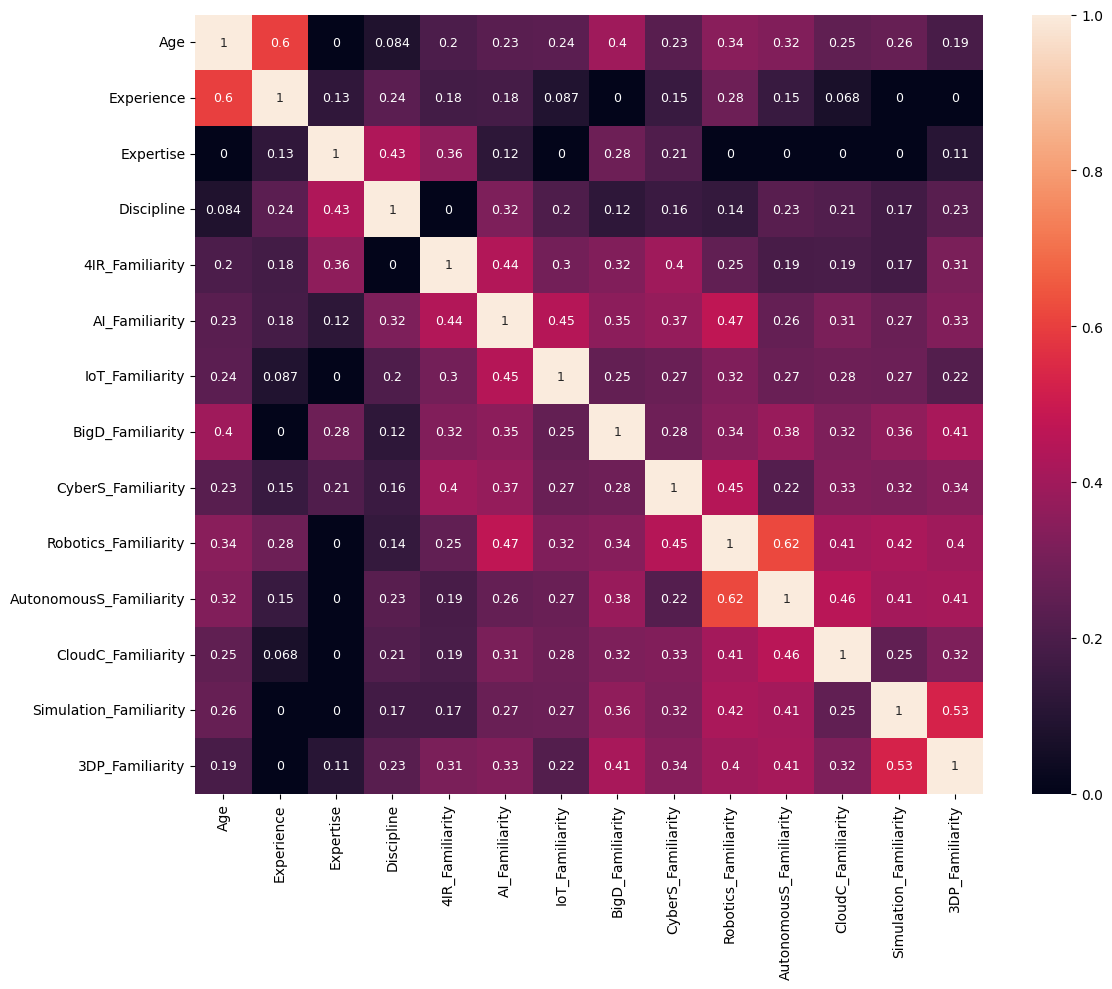

In [ ]:
# Sample categorical data
data = df[columns_to_test2]

# Function to calculate Cramér's V for two categorical variables
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for each pair of categorical variables
variables = data.columns
length = len(variables)
cramers_matrix = np.zeros((len(variables), len(variables)))
for i in range(len(variables)):
    for j in range(len(variables)):
        confusion_matrix = pd.crosstab(data[variables[i]], data[variables[j]])
        cramers_matrix[i, j] = cramers_v(confusion_matrix)

 # Adjustments for visibility
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, annot_kws={"size": 9}, xticklabels=variables, yticklabels=variables)

# Save the heatmap as an image
plt.savefig("heatmap.png", bbox_inches="tight")

# Show the plot
plt.show()


In [ ]:
variables

Index(['Age', 'Experience', 'Expertise', 'Discipline', '4IR_Familiarity',
       'AI_Familiarity', 'IoT_Familiarity', 'BigD_Familiarity',
       'CyberS_Familiarity', 'Robotics_Familiarity', 'AutonomousS_Familiarity',
       'CloudC_Familiarity', 'Simulation_Familiarity', '3DP_Familiarity'],
      dtype='object')

In [ ]:
pip install xlsxwriter

# cramers_matrix

In [ ]:
matrix_to_save = np.vstack([variables, cramers_matrix])
new_column = variables.insert(0, "")

matrix_to_save = np.column_stack([new_column, matrix_to_save])
matrix = pd.DataFrame(matrix_to_save)

# Specify the Excel file name
excel_file = "/content/drive/MyDrive/Colab Notebooks/matrix_data_EMR_All.xlsx"
with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
    matrix.to_excel(writer, index=False, header=False)

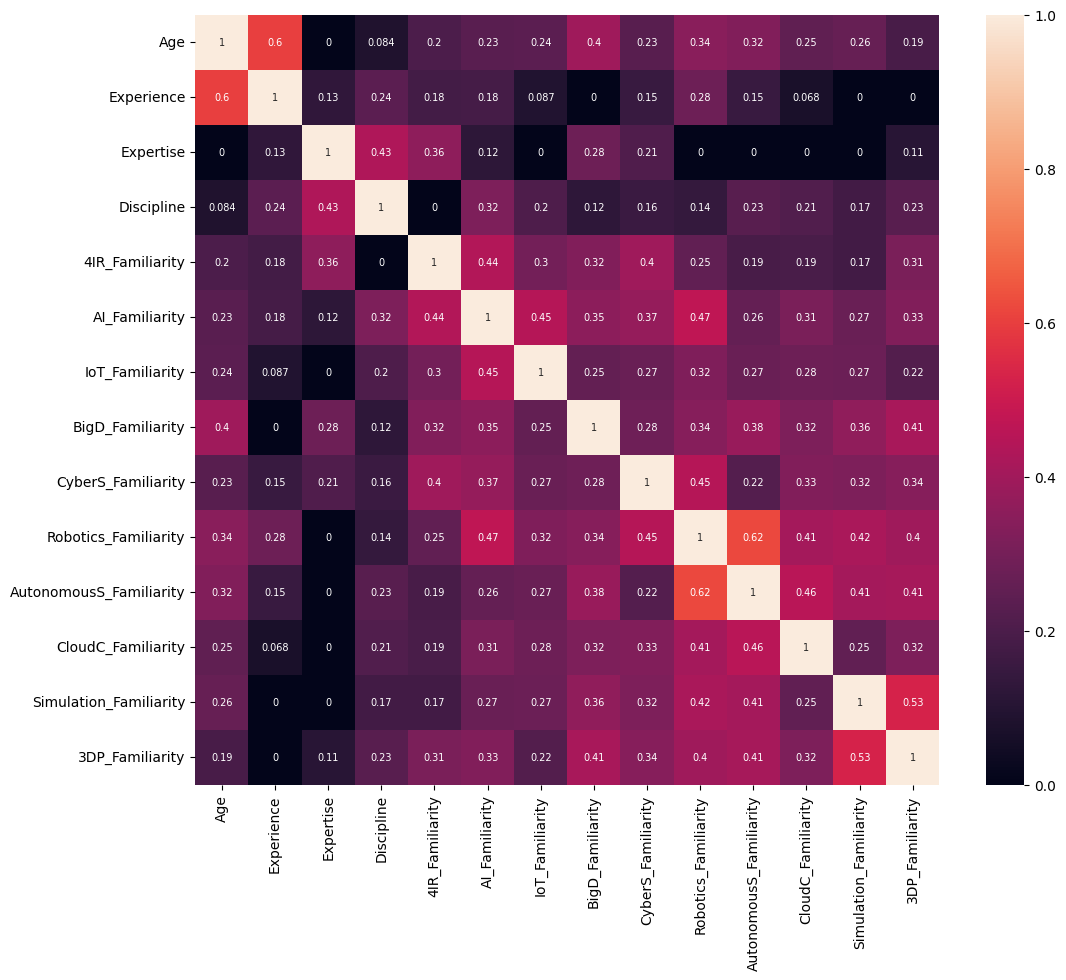

In [ ]:
# Adjustments for visibility
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, annot_kws={"size": 7}, xticklabels=variables, yticklabels=variables)

# Save the heatmap as an image
plt.savefig("heatmap.png", bbox_inches="tight")

# Show the plot
plt.show()

# Log-Linear Models

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
columns_LLM = ['Discipline', 'Experience', 'AI_Familiarity']

In [ ]:
# Example data (replace this with your actual data)
dataLLM = df[columns_LLM]

# Create a frequency table or contingency table
contingency_table = pd.crosstab([dataLLM['Discipline'], dataLLM['Experience']], dataLLM['AI_Familiarity'])

# Fit a Log-Linear Model with interactions
model_formula = 'AI_Familiarity ~ Discipline * Experience'
model = ols(model_formula, data=dataLLM).fit()

# Display summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         AI_Familiarity   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     4.398
Date:                Wed, 28 Aug 2024   Prob (F-statistic):            0.00640
Time:                        15:33:31   Log-Likelihood:                -119.59
No. Observations:                  86   AIC:                             247.2
Df Residuals:                      82   BIC:                             257.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.03

In [ ]:
import pandas as pd
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Create a frequency table or contingency table
contingency_table = pd.crosstab([dataLLM['Discipline'], dataLLM['Experience']], dataLLM['AI_Familiarity'])

# Perform Stepwise Regression for variable selection
lr = LinearRegression()
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(contingency_table, contingency_table.index)

# Get selected features
selected_features = list(sfs.k_feature_names_)

# Fit the model using selected features
X = contingency_table[selected_features]
y = contingency_table.index
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()

# Display summary statistics
print(result.summary())


# P-Value Matrix

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Sample categorical data
data = df[columns_to_test2]

# Function to calculate chi-square p-value for two categorical variables
def chi_square_p_value(confusion_matrix):
    chi2, p, _, _ = chi2_contingency(confusion_matrix)
    return p

# Calculate p-values for each pair of categorical variables
variables = data.columns
length = len(variables)
p_values_matrix = np.zeros((len(variables), len(variables)))
for i in range(len(variables)):
    for j in range(len(variables)):
        confusion_matrix = pd.crosstab(data[variables[i]], data[variables[j]])
        p_values_matrix[i, j] = chi_square_p_value(confusion_matrix)




In [ ]:
matrix_to_save = np.vstack([variables, p_values_matrix])
new_column = variables.insert(0, "")

matrix_to_save = np.column_stack([new_column, matrix_to_save])
matrix = pd.DataFrame(matrix_to_save)

# Specify the Excel file name
excel_file = "/content/drive/MyDrive/Colab Notebooks/matrix_data_EMRD_PValues_All.xlsx"
with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
    matrix.to_excel(writer, index=False, header=False)

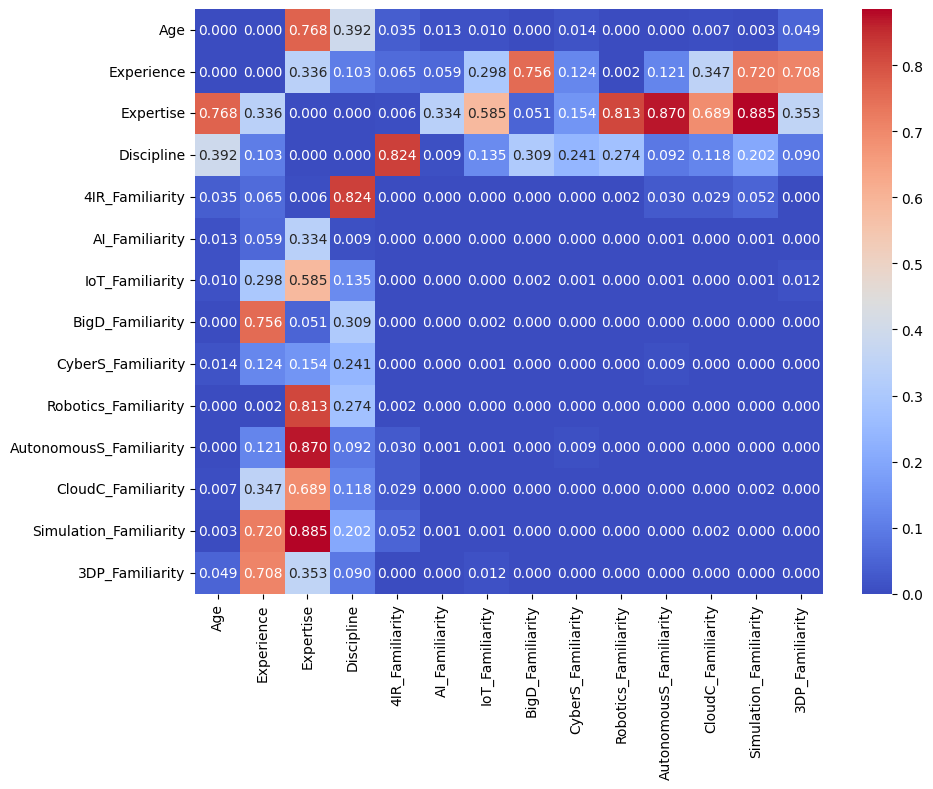

In [ ]:
# Adjustments for visibility
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_matrix, annot=True, fmt=".3f", annot_kws={"size": 10}, xticklabels=variables, yticklabels=variables, cmap="coolwarm")

# Save the heatmap as an image
plt.savefig("p_values_heatmap.png", bbox_inches="tight")

# Show the plot
plt.show()

Network Graph

In [ ]:
import pandas as pd

# Open Dataset
path = "/content/drive/MyDrive/Colab Notebooks/Graph.xlsx"
df1 = pd.read_excel(path, index_col=0, sheet_name='EMRD_AB')

column_names = list(df1.columns.values)
att_names=list(df1.columns.values)
att_names.remove(att_names[0])
size_col=len(column_names)
size_att=len(att_names)

i=0
while(i<size_att):
    print("G.add_node(\""+ att_names[i] +"\")")
    i=i+1

for row in range(size_col-1):
    for col in range(size_col-1):
        node1 = column_names[row+1]
        node2 = column_names[col+1]
        value = df1.iloc[row, col+1]
        if(value<0.05 and value>0):
            if(value<0.05 and value>0.01):
                print("G.add_edge(\"" + node1 + "\" , \"" + node2 + "\" , color=\'g\',weight=0.5)")
            elif(value<0.01 and value>0.001):
                print("G.add_edge(\"" + node1 + "\" , \"" + node2 + "\" , color=\'g\',weight=1.5)")
            elif (value < 0.001):
                print("G.add_edge(\"" + node1 + "\" , \"" + node2 + "\" , color=\'g\',weight=2.5)")
    print()

G.add_node("T.Adp")
G.add_node("IOE")
G.add_node("BCG")
G.add_node("IPLMD")
G.add_node("OSCM")
G.add_node("IKSCW")
G.add_node("FA")
G.add_node("IDADM")
G.add_node("BCE")
G.add_node("EPI")
G.add_node("IP")
G.add_node("ESM")




G.add_edge("OSCM" , "IOE" , color='g',weight=1.5)

G.add_edge("IKSCW" , "IOE" , color='g',weight=1.5)
G.add_edge("IKSCW" , "IPLMD" , color='g',weight=1.5)

G.add_edge("FA" , "BCG" , color='g',weight=2.5)
G.add_edge("FA" , "IPLMD" , color='g',weight=0.5)

G.add_edge("IDADM" , "BCG" , color='g',weight=2.5)
G.add_edge("IDADM" , "IPLMD" , color='g',weight=0.5)
G.add_edge("IDADM" , "OSCM" , color='g',weight=2.5)
G.add_edge("IDADM" , "IKSCW" , color='g',weight=1.5)

G.add_edge("BCE" , "IPLMD" , color='g',weight=1.5)
G.add_edge("BCE" , "OSCM" , color='g',weight=1.5)
G.add_edge("BCE" , "IKSCW" , color='g',weight=1.5)
G.add_edge("BCE" , "FA" , color='g',weight=2.5)

G.add_edge("EPI" , "BCG" , color='g',weight=2.5)
G.add_edge("EPI" , "FA" , color='g',weight=1.5)

G.add_edg

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


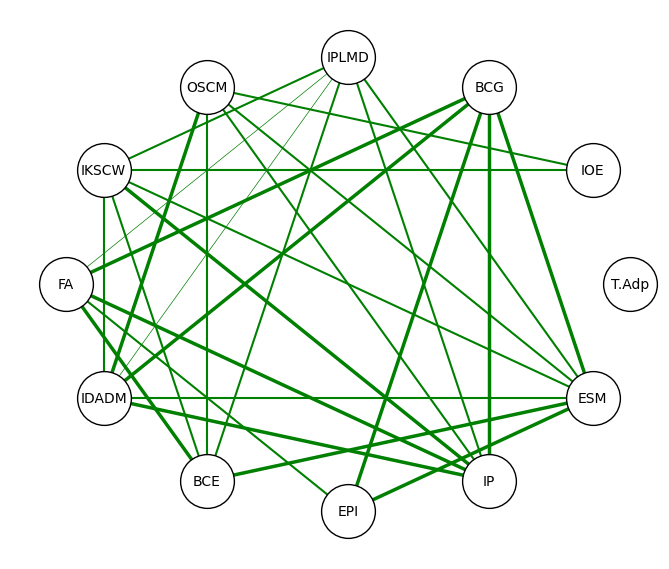

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import clique

plt.rcParams["figure.figsize"] = [6.50, 5.50]
plt.rcParams["figure.autolayout"] = True

G = nx.Graph()

G.add_node("T.Adp")
G.add_node("IOE")
G.add_node("BCG")
G.add_node("IPLMD")
G.add_node("OSCM")
G.add_node("IKSCW")
G.add_node("FA")
G.add_node("IDADM")
G.add_node("BCE")
G.add_node("EPI")
G.add_node("IP")
G.add_node("ESM")




G.add_edge("OSCM" , "IOE" , color='g',weight=1.5)

G.add_edge("IKSCW" , "IOE" , color='g',weight=1.5)
G.add_edge("IKSCW" , "IPLMD" , color='g',weight=1.5)

G.add_edge("FA" , "BCG" , color='g',weight=2.5)
G.add_edge("FA" , "IPLMD" , color='g',weight=0.5)

G.add_edge("IDADM" , "BCG" , color='g',weight=2.5)
G.add_edge("IDADM" , "IPLMD" , color='g',weight=0.5)
G.add_edge("IDADM" , "OSCM" , color='g',weight=2.5)
G.add_edge("IDADM" , "IKSCW" , color='g',weight=1.5)

G.add_edge("BCE" , "IPLMD" , color='g',weight=1.5)
G.add_edge("BCE" , "OSCM" , color='g',weight=1.5)
G.add_edge("BCE" , "IKSCW" , color='g',weight=1.5)
G.add_edge("BCE" , "FA" , color='g',weight=2.5)

G.add_edge("EPI" , "BCG" , color='g',weight=2.5)
G.add_edge("EPI" , "FA" , color='g',weight=1.5)


G.add_edge("IP" , "BCG" , color='g',weight=2.5)
G.add_edge("IP" , "IPLMD" , color='g',weight=1.5)
G.add_edge("IP" , "OSCM" , color='g',weight=1.5)
G.add_edge("IP" , "IKSCW" , color='g',weight=2.5)
G.add_edge("IP" , "FA" , color='g',weight=2.5)
G.add_edge("IP" , "IDADM" , color='g',weight=2.5)

G.add_edge("ESM" , "BCG" , color='g',weight=2.5)
G.add_edge("ESM" , "IPLMD" , color='g',weight=1.5)
G.add_edge("ESM" , "OSCM" , color='g',weight=1.5)
G.add_edge("ESM" , "IKSCW" , color='g',weight=1.5)
G.add_edge("ESM" , "IDADM" , color='g',weight=1.5)
G.add_edge("ESM" , "BCE" , color='g',weight=2.5)
G.add_edge("ESM" , "EPI" , color='g',weight=2.5)


colors = nx.get_edge_attributes(G, 'color').values()
weights = list(nx.get_edge_attributes(G, 'weight').values())

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=1500, node_color='white',edgecolors='black',edge_color=colors, width=weights)
plt.show()

Maximal Cliques: 0
['T.Adp']
['FA', 'IPLMD', 'BCE']
['FA', 'IPLMD', 'IP']
['FA', 'BCG', 'IP']
['FA', 'BCG', 'EPI']
['ESM', 'IDADM', 'IKSCW', 'IPLMD']
['ESM', 'IDADM', 'OSCM']
['ESM', 'IDADM', 'BCG']
['ESM', 'BCE', 'IKSCW', 'IPLMD']
['ESM', 'BCE', 'OSCM']
['ESM', 'EPI', 'BCG']
['IP', 'IDADM', 'IKSCW', 'IPLMD']
['IP', 'IDADM', 'OSCM']
['IP', 'IDADM', 'BCG']
['IOE', 'IKSCW']
['IOE', 'OSCM']


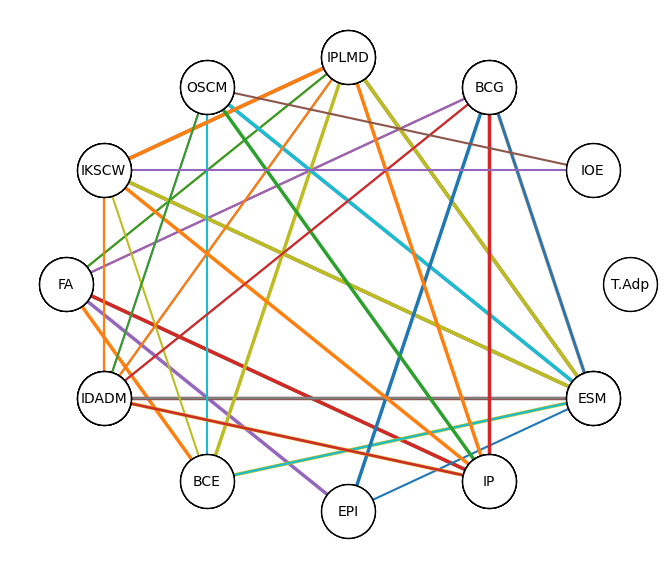

In [ ]:
#Maximal Clique
import matplotlib.colors as mcolors

colors = nx.get_edge_attributes(G, 'color').values()
weights = list(nx.get_edge_attributes(G, 'weight').values())

# Find all maximal cliques
maximal_cliques = list(nx.find_cliques(G))
sel_maximal_cliques=[]

# Display maximal cliques and the nodes that they consist of
required_cliques=0
print("Maximal Cliques:",required_cliques)
for clique in maximal_cliques:
  if len(clique)>required_cliques:
    sel_maximal_cliques.append(clique)
    print(clique)

# Draw the graph
pos = nx.circular_layout(G)

# Draw the graph with node labels
nx.draw(G, pos, with_labels=True, font_size=10, node_size=1500, node_color='white',edgecolors='black',edge_color='white', width=weights)

# Define a list of colors to cycle through, here we take colors from matplotlib's tableau palette
color_list = list(mcolors.TABLEAU_COLORS.values())

# Highlight each maximal clique with a different color
for i, clique in enumerate(sel_maximal_cliques):
    color = color_list[i % len(color_list)]  # Cycle through the color list
    nx.draw_networkx_nodes(G, pos, label=clique, nodelist=clique,node_size=1500, node_color='white',edgecolors='black')
    subgraph = G.subgraph(clique)
    nx.draw_networkx_edges(G, pos, edgelist=subgraph.edges(), edge_color=color,width=weights)

plt.show()

['ESM', 'IDADM', 'IKSCW', 'IPLMD']


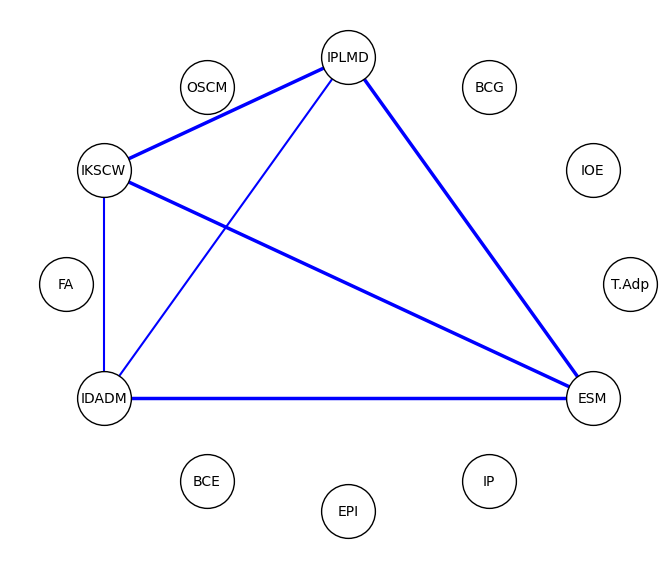

In [ ]:
#Maximum Clique
colors = nx.get_edge_attributes(G, 'color').values()
weights = list(nx.get_edge_attributes(G, 'weight').values())

# Find all maximal cliques
maximal_cliques = list(nx.find_cliques(G))
maximum_clique=list(max(maximal_cliques, key=len))
print(maximum_clique)

# Draw the graph
pos = nx.circular_layout(G)

# Draw the graph with node labels
nx.draw(G, pos, with_labels=True, font_size=10, node_size=1500, node_color='white',edgecolors='black',edge_color='white', width=weights)
subgraph = G.subgraph(maximum_clique)
nx.draw_networkx_edges(G, pos, edgelist=subgraph.edges(), edge_color='blue',width=weights)

plt.show()